In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
# Read data
data = pd.read_csv("customer_data.csv")

In [3]:
# convert gender to numerical value (0 for Male, 1 for Female)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Fill missing values(Median)
data.fillna(data.median(), inplace=True)

In [4]:
# Extract features
X = data.iloc[:, 2:].values 

# number of clusters
num_clusters = 5

In [6]:
# apply KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = labels

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train the KMeans model on the training data
kmeans_train = KMeans(n_clusters=num_clusters)
kmeans_train.fit(X_train)

KMeans(n_clusters=5)

In [7]:
# Predict clusters on the test set
test_labels = kmeans_train.predict(X_test)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(X_test, test_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40016910431581854


In [8]:
# Save the trained KMeans model
joblib.dump(kmeans_train, "kmeans_model.pkl")

['kmeans_model.pkl']

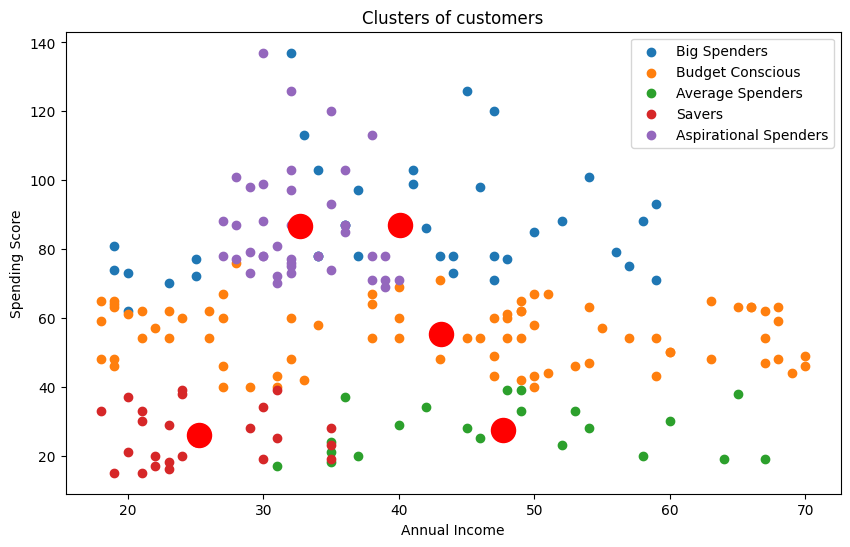

In [9]:
# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = labels

# Define cluster names
cluster_names = {
    0: "Big Spenders",
    1: "Budget Conscious",
    2: "Average Spenders",
    3: "Savers",
    4: "Aspirational Spenders"
}

# Map cluster names to labels
data['Cluster Name'] = data['Cluster'].map(cluster_names)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=cluster_names[i])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()